# Car Price Prediction 

# Problem Statement

# Dataset Description

# Aim

# Work Flow 

# Importing The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Data Preprocessing

In [2]:
car_dataset = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Car Dataset\car data.csv")

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
## Checking the categorial columns

In [8]:
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
## Checking the distribution of categorial data

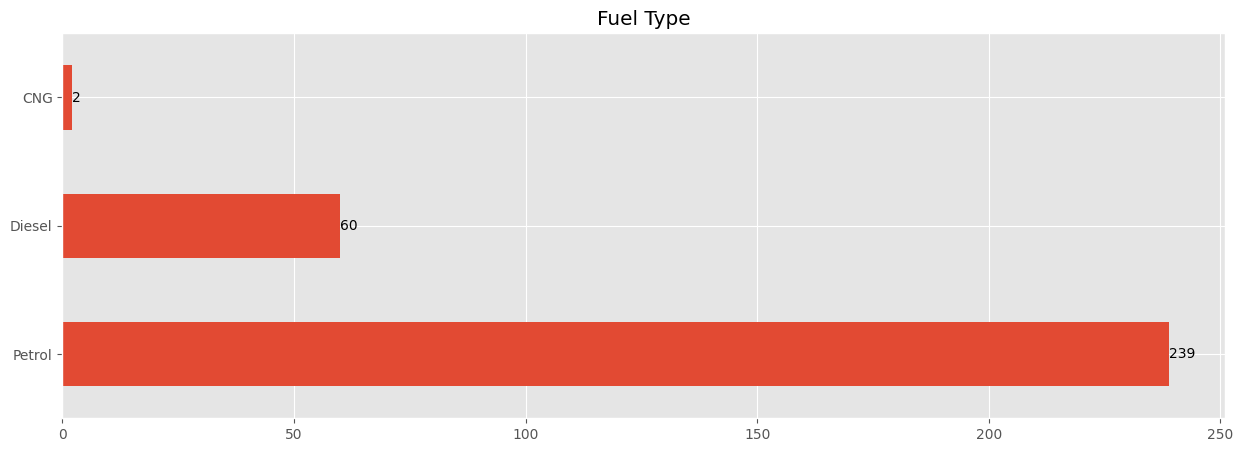

In [10]:
ax = car_dataset['Fuel_Type'].value_counts().plot(kind = "barh", figsize = (15,5))
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('')    
plt.title('Fuel Type')     
plt.show()

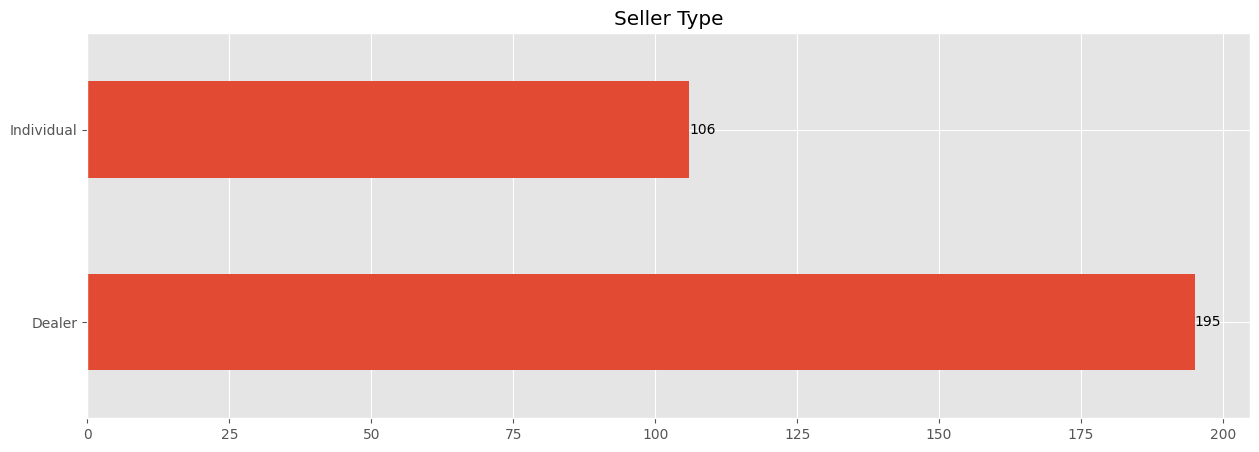

In [11]:
ax =car_dataset.Seller_Type.value_counts().plot(kind = 'barh', figsize = (15,5))
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('')    
plt.title('Seller Type')    
plt.show()

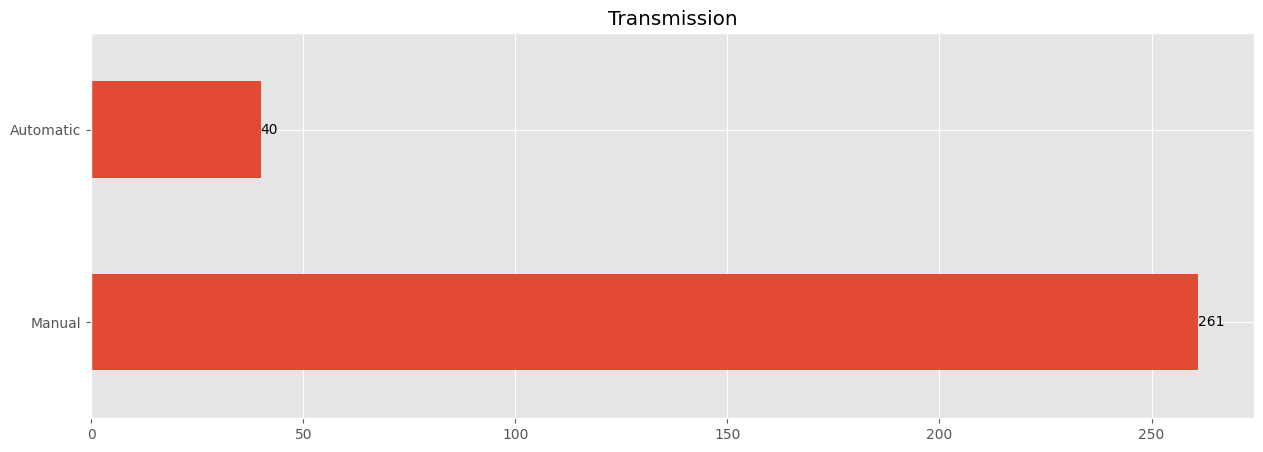

In [13]:
ax = car_dataset['Transmission'].value_counts().plot(kind = "barh", figsize = (15,5))
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('')    
plt.title('Transmission')     
plt.show()

In [16]:
# Encoding Categorial columns

In [18]:

car_dataset['Fuel_Type'].replace({'Petrol': 0 , 'Diesel': 1, 'CNG': 2}, inplace = True)

car_dataset['Seller_Type'].replace({'Dealer': 0 , 'Individual': 1 }, inplace = True)

car_dataset['Transmission'].replace({'Manual': 0 , 'Automatic': 1 }, inplace = True)


In [19]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [21]:
car_dataset.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

In [22]:
# We can Drop The Car name 

In [23]:
car_dataset.drop( columns = 'Car_Name', axis = 1 , inplace = True)

In [25]:
car_dataset.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0


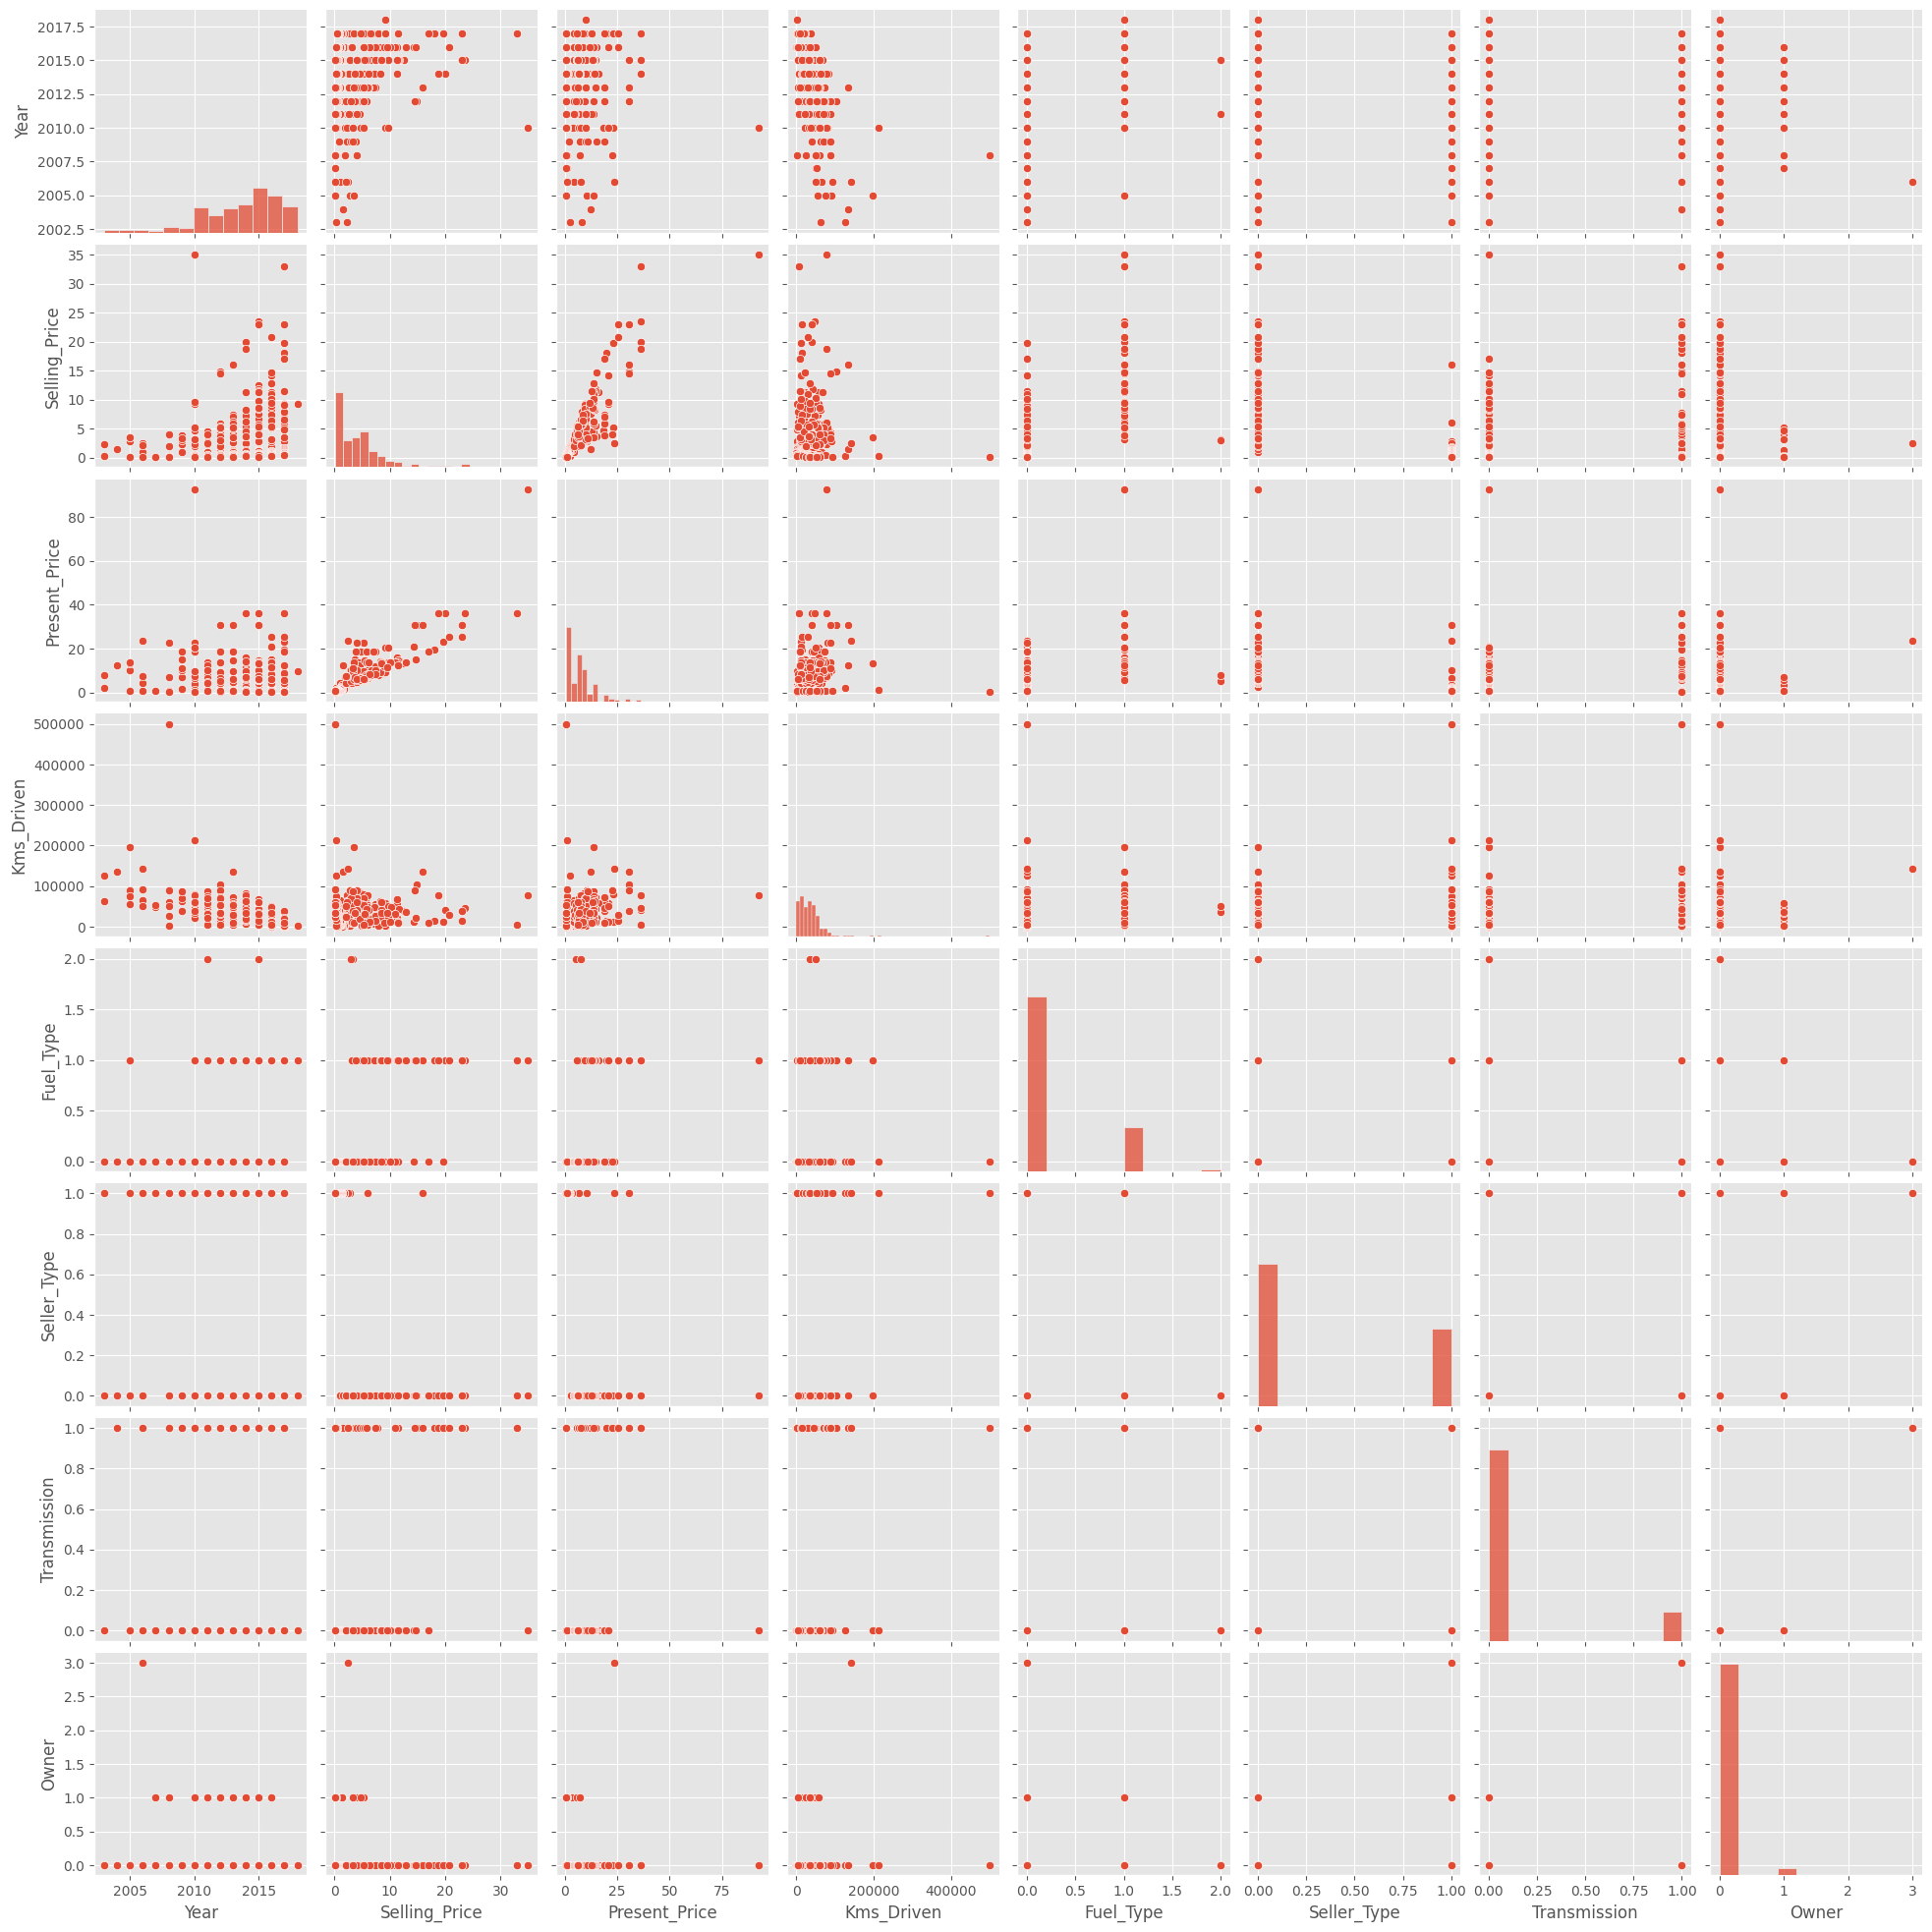

In [167]:
import warnings as w
w.filterwarnings('ignore')
sns.pairplot(car_dataset, palette = "husl")
plt.show()

<Axes: >

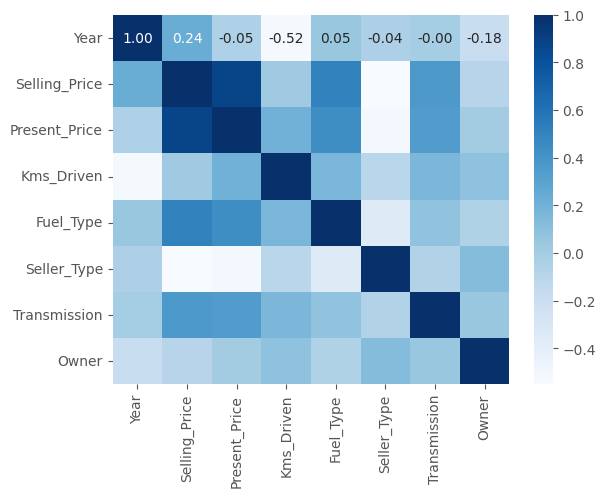

In [166]:
sns.heatmap(car_dataset.corr(), annot = True, cmap = 'Blues', fmt = "1.2f" )

In [26]:
# Splitting The Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Selling Price = Target Variable

In [31]:
x = car_dataset.drop(columns = 'Selling_Price', axis = 1)
y = car_dataset["Selling_Price"]

In [32]:
x.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0


In [33]:
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [34]:
# splitting the data in training and test data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 42)

In [42]:
# Model training

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lin_reg = LinearRegression()

In [48]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [49]:
# Model Evaluation

In [55]:
# Predicting on training data
training_data_Pred = lin_reg.predict(x_train)

In [56]:
from sklearn.metrics import r2_score

In [128]:
# R Square Error
r2_score(y_train, training_data_Pred)

0.8806173715719132

In [60]:
# Visualizing the actual vs predict

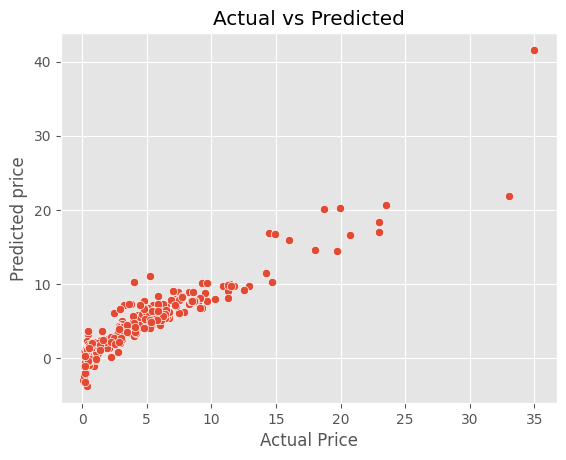

In [127]:
sns.scatterplot(x = y_train, y = training_data_Pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [71]:
# Predicting on test data
test_data_Pred = lin_reg.predict(x_test)

In [148]:
# r2_score
linear_r2 = r2_score(y_test, test_data_Pred)*100
linear_r2

83.1106947624407

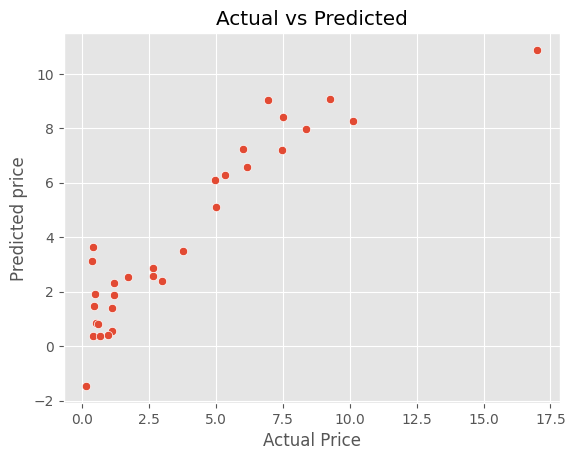

In [84]:
sns.scatterplot(x = y_test, y = test_data_Pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

# Lasso Regression 

In [85]:
from sklearn.linear_model import Lasso

In [86]:
lasso_reg = Lasso()

In [87]:
lasso_reg.fit(x_train, y_train)

Lasso()

In [90]:
# Train Data Prediction
train_pred = lasso_reg.predict(x_train)

In [142]:
r2_score(y_train, train_pred)

84.36909482009372

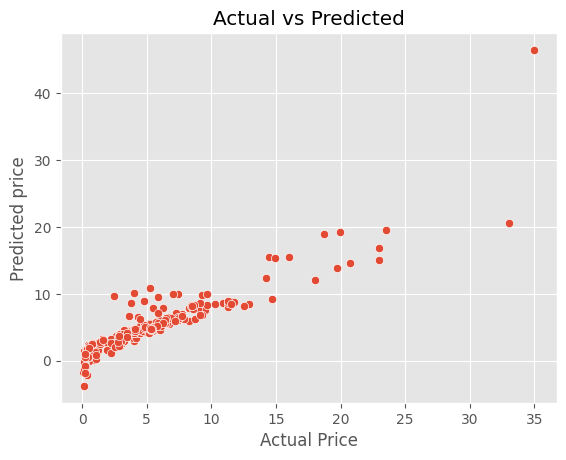

In [95]:
sns.scatterplot(x = y_train, y = train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [115]:
# Test Data Prediction
test_Pred = lin_reg.predict(x_test)

In [158]:
lasso_r2 = r2_score(y_test, test_Pred)*100
lasso_r2

83.1106947624407

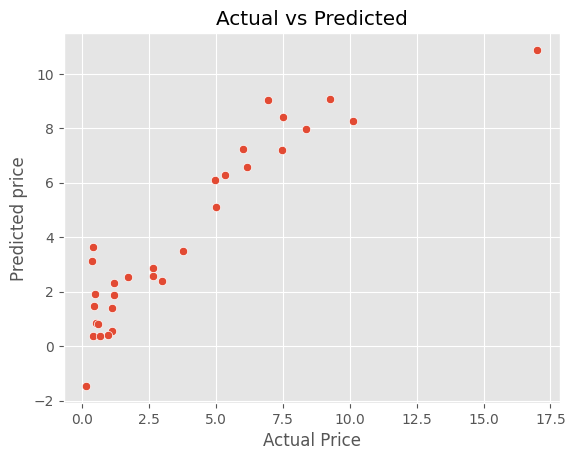

In [156]:
sns.scatterplot(x = y_test, y = test_Pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error

In [154]:
Linear_mse = mean_squared_error(y_test, test_data_Pred)
print(f"Mean Squared Error of Linear: {Linear_mse}")

Mean Squared Error of Linear: 2.518926308345919


In [155]:
Lasso_mse = mean_squared_error(y_test, test_Pred)
print(f"Mean Squared Error of Linear: {Lasso_mse}")

Mean Squared Error of Linear: 2.518926308345919


In [152]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'],
    'MSE': [Linear_mse, Lasso_mse],
    'R² Score': [linear_r2, lasso_r2]
})

In [153]:
results

,Model,MSE,R² Score
0,Linear Regression,2.518926,83.110695
1,Lasso Regression,2.518926,83.110695
